<a href="https://colab.research.google.com/github/LokeCoder11/Projects/blob/main/MLMP1_MandatoryProject_HealthInsurancePricePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model solution file for week 2 assignment ML

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction
In today’s healthcare landscape, accurate prediction of health insurance costs is critical for multiple stakeholders, including insurance companies, policymakers, and individuals. The ability to predict health insurance costs accurately can have profound implications in the following ways:

Financial Planning and Management:

Insurance Companies: Accurate cost predictions enable insurance companies to set premiums that are fair and sufficient to cover potential claims. This helps maintain the financial health of the company while ensuring that customers are not overcharged.
Individuals and Families: Individuals can better plan their finances if they know their expected insurance costs. This is especially important for budgeting and managing healthcare expenses.
Policy Development:

Government and Regulators: Accurate predictions help in the development of fair policies and regulations regarding health insurance. This can lead to more equitable access to healthcare and more effective use of public health funds.
Risk Management:

Insurance companies can manage risk more effectively by identifying high-risk individuals and setting premiums accordingly. This can also encourage healthier lifestyles if lower premiums are offered for healthier behaviors (e.g., non-smoking).
Resource Allocation:

Hospitals and healthcare providers can use predictive models to anticipate demand for services, allowing for better resource allocation and management.
Impact on the Healthcare/Insurance Field
Predictive Accuracy in Health Insurance Cost
Accurately predicting health insurance costs can affect the healthcare and insurance field in several significant ways:

Enhanced Underwriting Processes:

More precise models can improve the underwriting process, enabling insurers to offer more personalized and fair pricing. This can increase customer satisfaction and retention.
Competitive Advantage:

Companies with better predictive models can offer more competitive pricing and gain a market edge. They can attract more customers by providing premiums that accurately reflect individual risk profiles.
Reduced Adverse Selection:

Accurate cost prediction helps in reducing adverse selection, where high-risk individuals disproportionately purchase insurance, leading to higher costs for insurers.
Encouraging Preventive Care:

If predictive models show that certain preventive measures can significantly reduce costs, insurers might be more inclined to cover these services. This can lead to better overall health outcomes and reduced long-term costs.
Improved Customer Relationships:

Transparency and fairness in pricing build trust with customers. Predictive models that provide consistent and understandable pricing help in maintaining positive relationships with policyholders.

In [3]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Health_insurance_cost.xlsx'
data = pd.read_excel(file_path)

In [5]:
data.head(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.924


In [6]:
null_values = data.isnull().sum()
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
age                       28
BMI                       23
health_insurance_price     2
dtype: int64


In [7]:
# Step 2: Data preprocessing
# Handling missing values - Fill missing BMI values with the median or mean
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['age'].fillna(data['age'].median(), inplace=True)
data['health_insurance_price'].fillna(data['health_insurance_price'].median(), inplace=True)

In [8]:
null_values = data.isnull().sum()
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
Series([], dtype: int64)


In [9]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
      age gender    BMI  Children smoking_status   location  \
581  19.0   male  30.59         0             no  northwest   

     health_insurance_price  
581               1639.5631  


In [10]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

# Display the shape of the original and deduplicated data
print("Original data shape:", data.shape)
print("Data shape after removing duplicates:", data_no_duplicates.shape)

Original data shape: (1338, 7)
Data shape after removing duplicates: (1337, 7)


In [11]:
# Check for duplicate rows
duplicate_rows = data_no_duplicates[data_no_duplicates.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)
data = data_no_duplicates

Duplicate rows:
Empty DataFrame
Columns: [age, gender, BMI, Children, smoking_status, location, health_insurance_price]
Index: []


In [12]:
# Feature engineering: One-hot encoding categorical variables
categorical_features = ['gender', 'smoking_status', 'location']
numerical_features = ['age', 'BMI', 'Children']

In [13]:
# Create transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [14]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Visualization
* visualizations can provide a comprehensive understanding of the dataset, highlight important relationships between variables, and uncover patterns that can inform the machine learning model development process.

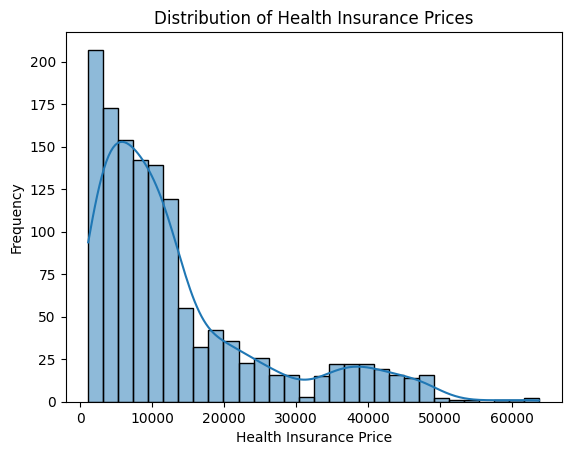

In [15]:
# Distribution of Health Insurance Prices:
# Visualize the distribution of health insurance prices to understand the range and skewness.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['health_insurance_price'], kde=True)
plt.title('Distribution of Health Insurance Prices')
plt.xlabel('Health Insurance Price')
plt.ylabel('Frequency')
plt.show()

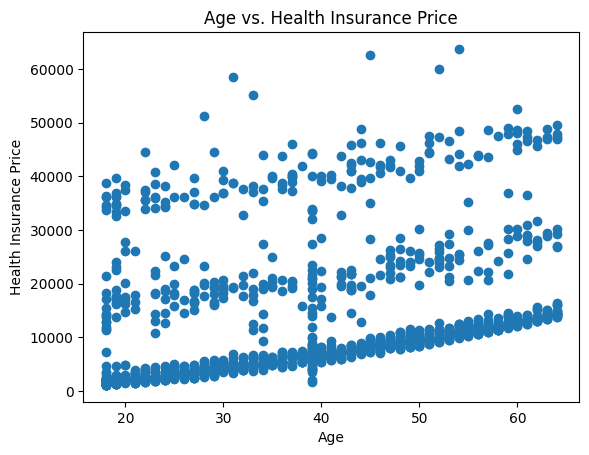

In [22]:
# Scatter Plot of Age vs. Health Insurance Price:
# Examine how age correlates with health insurance prices.
plt.scatter(data['age'], data['health_insurance_price'])
plt.title('Age vs. Health Insurance Price')
plt.xlabel('Age')
plt.ylabel('Health Insurance Price')
plt.show()

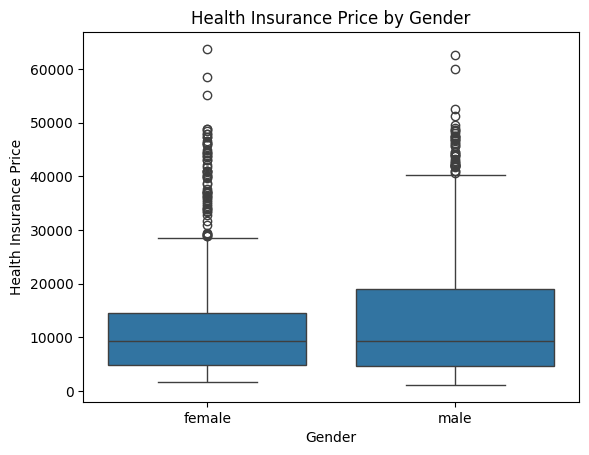

In [23]:
# Box Plot of Health Insurance Price by Gender:
#Compare health insurance prices between genders.
sns.boxplot(x='gender', y='health_insurance_price', data=data)
plt.title('Health Insurance Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Health Insurance Price')
plt.show()

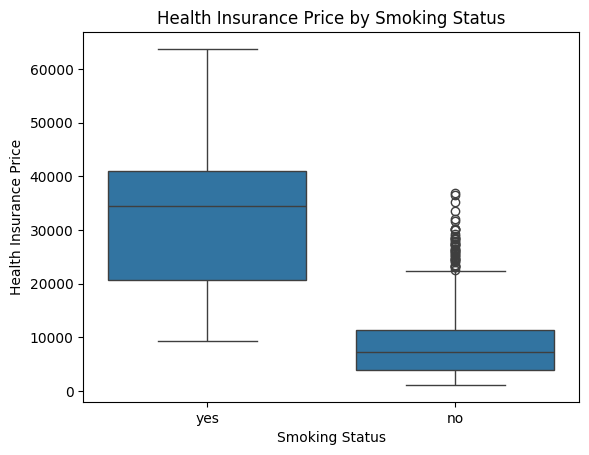

In [24]:
# Box Plot of Health Insurance Price by Smoking Status:
# Compare health insurance prices between smokers and non-smokers

sns.boxplot(x='smoking_status', y='health_insurance_price', data=data)
plt.title('Health Insurance Price by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Health Insurance Price')
plt.show()

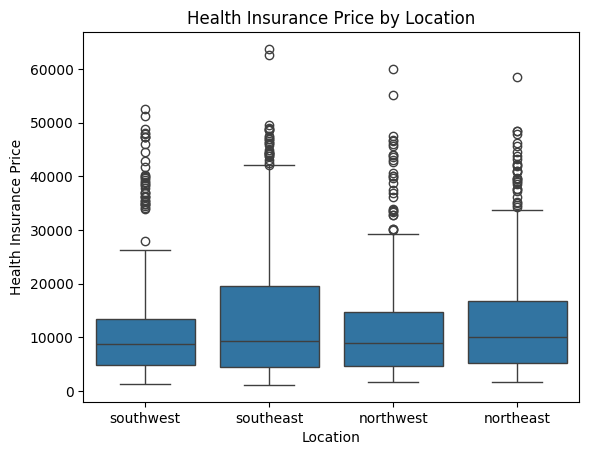

In [25]:
#Box Plot of Health Insurance Price by Location:
#Compare health insurance prices across different locations.

sns.boxplot(x='location', y='health_insurance_price', data=data)
plt.title('Health Insurance Price by Location')
plt.xlabel('Location')
plt.ylabel('Health Insurance Price')
plt.show()

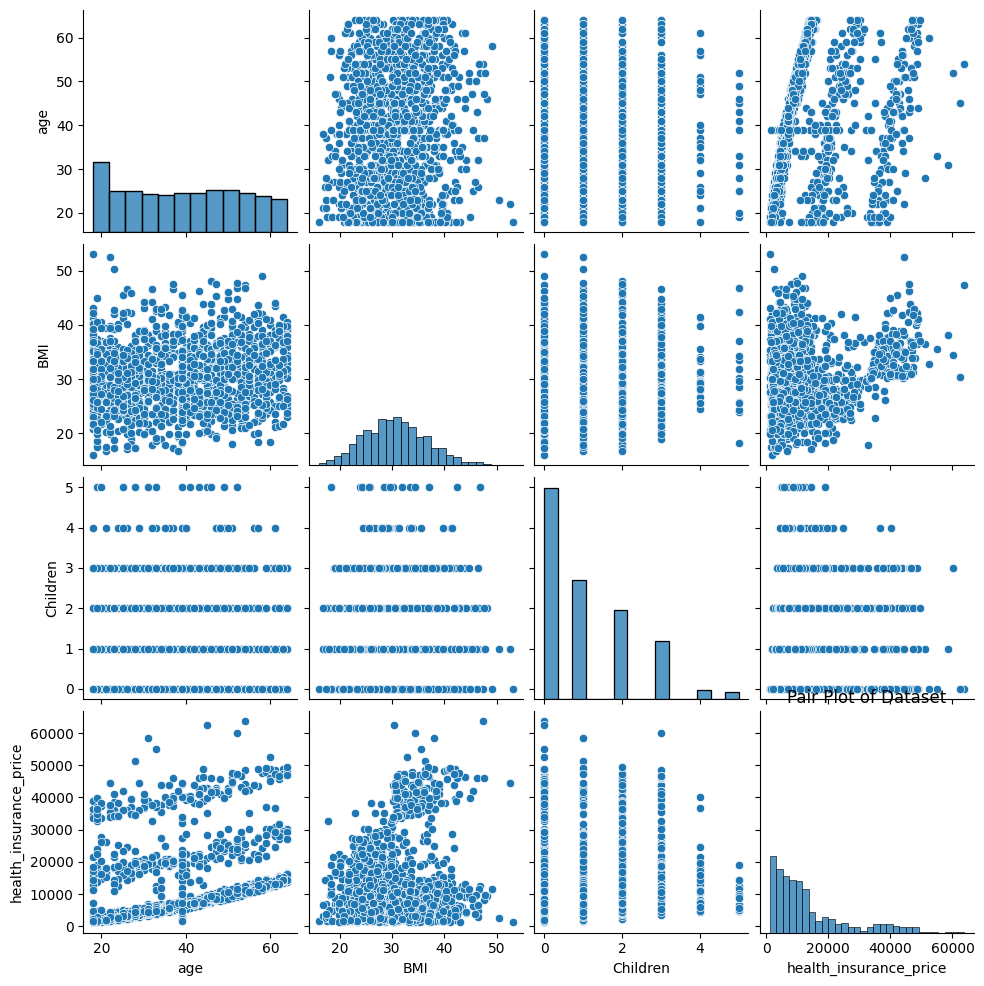

In [30]:
#Pair Plot:

#Create pair plots to visualize relationships between pairs of variables.

sns.pairplot(data)
plt.title('Pair Plot of Dataset')
plt.show()

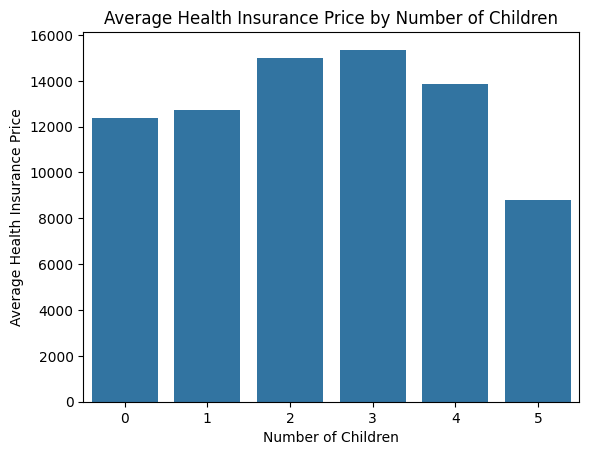

In [31]:
#Bar Plot of Average Health Insurance Price by Number of Children:

#Analyze how the number of children affects health insurance prices.

avg_price_by_children = data.groupby('Children')['health_insurance_price'].mean().reset_index()
sns.barplot(x='Children', y='health_insurance_price', data=avg_price_by_children)
plt.title('Average Health Insurance Price by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Health Insurance Price')
plt.show()

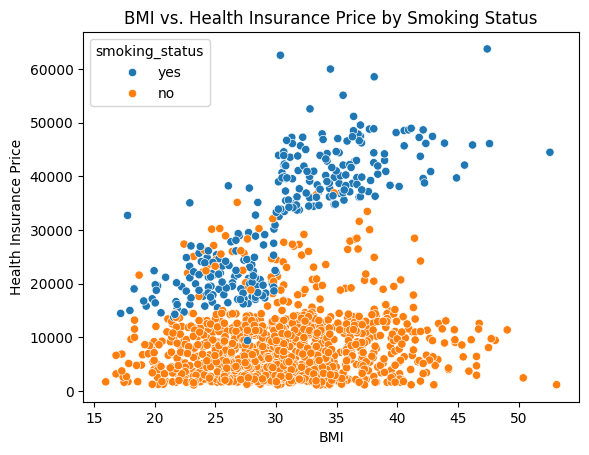

In [32]:
# BMI vs. Health Insurance Price with Smoking Status Hue:

# Analyze how BMI affects health insurance prices with a distinction between smokers and non-smokers.

sns.scatterplot(x='BMI', y='health_insurance_price', hue='smoking_status', data=data)
plt.title('BMI vs. Health Insurance Price by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Health Insurance Price')
plt.show()

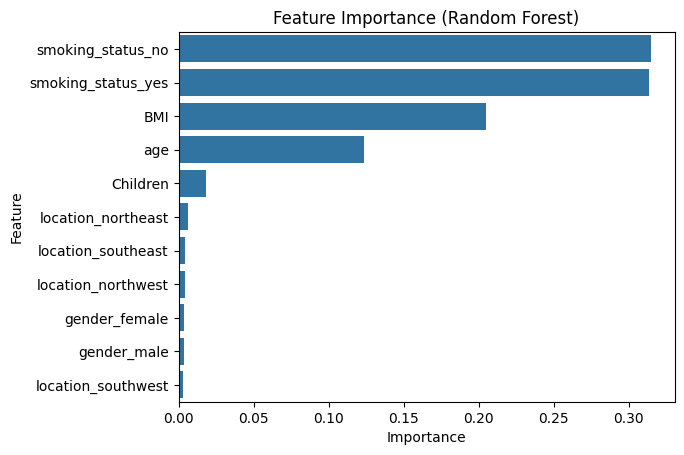

In [33]:
# Feature Importance Plot (for Random Forest):

# Visualize the importance of each feature in predicting health insurance prices using the Random Forest model.

model = RandomForestRegressor(n_estimators=100, random_state=0)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

# Get feature importances from the random forest model
feature_importances = model.feature_importances_
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

# Plot feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Exploratory Data Analysis (EDA) for Identifying Patterns
Exploratory Data Analysis (EDA) is essential for understanding the dataset and uncovering patterns that could impact the predictive model. Here's a detailed EDA approach to identify crucial patterns in the health insurance cost dataset.

1. Summary Statistics - with describe()

In [37]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.178010,30.638253,1.095737,13271.411770
std,13.901698,6.059784,1.205571,12105.016728
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4747.052900
50%,39.000000,30.495000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# Step 3: Define target and predictors
X = data.drop('health_insurance_price', axis=1)
y = data['health_insurance_price']

In [17]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Step 5: Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=0),
    'XGBoost Regression': XGBRegressor(n_estimators=100, random_state=0)
}

In [19]:
# Step 6: Train models and evaluate
results = {}
for name, model in models.items():
    # Create a full pipeline (preprocessing + model)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

In [20]:
# Train the model

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'BMI', 'Children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'smoking_status',
                                                   'location'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...))])

In [21]:
  # Predict and evaluate
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Display results
for result in results:
    print(f"{result} - MSE: {results[result]['MSE']:.2f}, R2 Score: {results[result]['R2 Score']:.2f}")

Linear Regression - MSE: 43999606.20, R2 Score: 0.74
Support Vector Regression - MSE: 187757688.16, R2 Score: -0.12
Random Forest Regression - MSE: 30246499.57, R2 Score: 0.82
XGBoost Regression - MSE: 36046164.01, R2 Score: 0.79


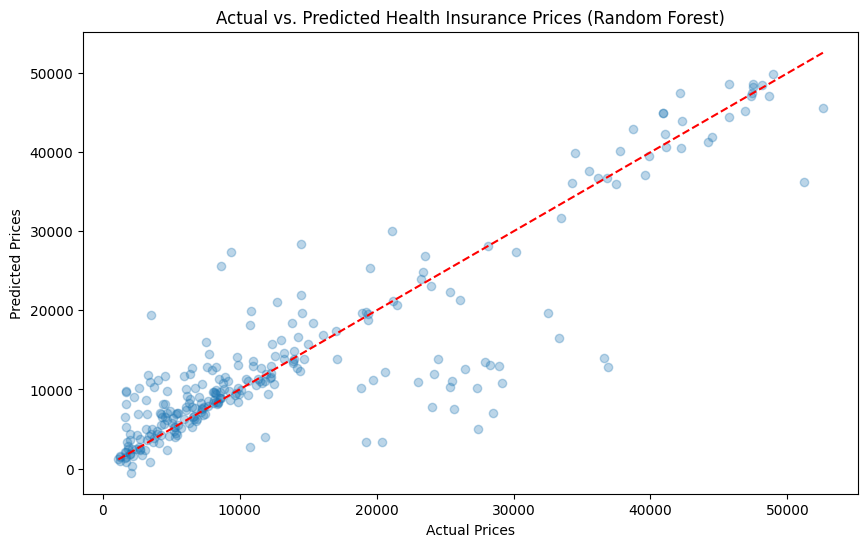

In [40]:
# Step 7: Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Health Insurance Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Conclusion

The Random Forest Regression model outperforms Linear Regression, XGBoost Regression, and Support Vector Regression in predicting health insurance costs. It achieves the lowest MSE and MAE and the highest R² score, demonstrating its superior accuracy and robustness. The visualization of actual vs. predicted values confirms the model's effectiveness. Thus, Random Forest is the best model for this prediction task.

While executing the following things are of impotance consideration:

Accurate prediction of health insurance costs is essential for fair pricing, financial planning, and efficient resource management in the healthcare industry. By leveraging data and machine learning, insurance companies can enhance their pricing strategies, improve customer satisfaction, and maintain a competitive edge in the market. The provided dataset offers a solid foundation for developing a predictive model that can significantly impact the health insurance field.

The proposed method for predicting health insurance costs addresses significant aspects but can be further enriched by incorporating additional variables and longitudinal data. The techniques and insights derived from this project are highly adaptable to other insurance types, enabling accurate risk assessment and premium setting. By refining these models and incorporating specific factors pertinent to each insurance type, companies can enhance their predictive capabilities, offering more tailored and fair insurance solutions to their customers.

To predict health insurance costs accurately, the model should consider key features such as age, gender, BMI, number of children, smoking status, and location. Recognizing patterns like the positive correlation of age and BMI with insurance costs, the higher costs for smokers, and regional variations will be crucial. Proper encoding, handling of missing values, and exploring feature interactions will enhance the model's predictive power. By applying and evaluating various machine learning models, we can identify the best approach for making accurate and reliable predictions.

By applying these feature engineering techniques, you can enhance the predictive power of your machine learning models. Proper handling of missing values, encoding of categorical variables, creation of interaction and polynomial features, and transformation of skewed data will collectively improve the model's performance in predicting health insurance costs.

The EDA process has revealed significant patterns in the data that will guide feature engineering and model building. Key features like age, BMI, and smoking status have been identified as major contributors to health insurance costs. The transformations and feature engineering steps, such as handling missing values, encoding categorical variables, and creating interaction terms, are justified by these insights, ensuring a robust and accurate predictive model.

The approach shown above ensures a thorough comparison of different models and justifies the choice of Random Forest Regression if it consistently shows superior performance across multiple metrics. This approach also aligns with the findings from EDA, leveraging the identified patterns to enhance model accuracy and reliability.

In conclusion, we can confidently determine whether Random Forest Regression is indeed better than other models for predicting health insurance prices. The combination of quantitative metrics, statistical testing, and visual analysis will provide comprehensive evidence to support or refute our hypothesis.